In [32]:
import tensorflow as tf
import keras 
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle


In [33]:
import numpy as np 
np.random.seed(5)


In [34]:
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [35]:
print(y_train)

[5 0 4 ... 5 6 8]


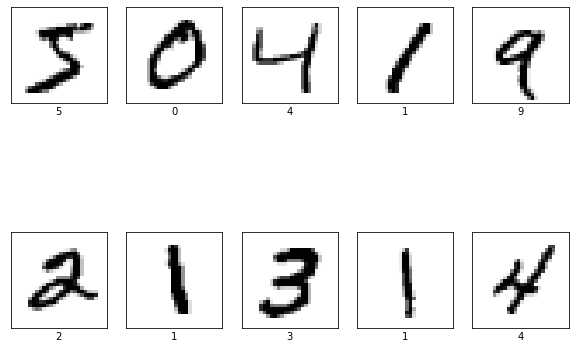

In [36]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,20))
for i in range (10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap =plt.cm.binary)
    plt.xlabel(y_train[i])


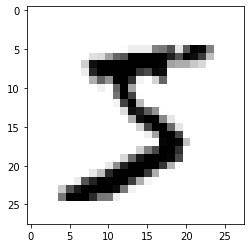

In [37]:
five = x_train[0].copy()
plt.imshow(five, cmap=plt.cm.binary)


[  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
 225 172 253 242 195  64   0   0   0   0]
[  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255   0   0   0   0]


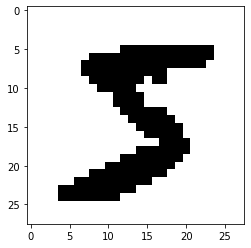

In [38]:
#Thresholding
print(five[6])
five[five>0]=255
print(five[6])

plt.imshow(five,cmap=plt.cm.binary)

In [39]:
print(f'we have {x_train.shape[0]} train samples')
print(f'we have {x_test.shape[0]} test samples')


we have 60000 train samples
we have 10000 test samples


In [40]:
# normalize the data
x_train,x_test = x_train/255.0 ,x_test /255.0#

In [41]:
# reshape the data into 1-D vecor
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
num_classes =10

In [42]:
x_train.shape[1]

784

In [43]:
# convert the class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [44]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [46]:
epochs= 60
learing_rate = 0.1
decay_rate = learing_rate / epochs
momentum =0.8
sgd=SGD(lr=learing_rate , momentum=momentum,decay=decay_rate, nesterov= False)

C:\Users\HP\anaconda3\envs\deeplearning\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [50]:
# building the model
input_dim =x_train.shape[1]

lr_model = Sequential()
lr_model.add(Dense(64,activation= tf.nn.relu,
kernel_initializer='uniform',input_dim= input_dim))

lr_model.add(Dropout(0.1))
lr_model.add(Dense(64,activation= tf.nn.relu))
lr_model.add(Dense(num_classes,kernel_initializer='uniform',activation=tf.nn.softmax))

# compile the model
lr_model.compile(loss='categorical_crossentropy',
optimizer=sgd,
metrics= ['acc'])

In [51]:
%%time
#Fit the model
batch_size = int(input_dim/100)

lr_model_history = lr_model.fit(x_train,y_train,batch_size= batch_size,epochs = epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/60
8572/8572 [==============================] - 15s 1ms/step - loss: 0.3769 - acc: 0.8857 - val_loss: 0.1864 - val_acc: 0.9433
Epoch 2/60
8572/8572 [==============================] - 11s 1ms/step - loss: 0.2163 - acc: 0.9336 - val_loss: 0.1615 - val_acc: 0.9506
Epoch 3/60
8572/8572 [==============================] - 12s 1ms/step - loss: 0.1929 - acc: 0.9414 - val_loss: 0.1479 - val_acc: 0.9548
Epoch 4/60
8572/8572 [==============================] - 11s 1ms/step - loss: 0.1815 - acc: 0.9445 - val_loss: 0.1440 - val_acc: 0.9570
Epoch 5/60
8572/8572 [==============================] - 11s 1ms/step - loss: 0.1730 - acc: 0.9468 - val_loss: 0.1404 - val_acc: 0.9571
Epoch 6/60
8572/8572 [==============================] - 11s 1ms/step - loss: 0.1694 - acc: 0.9487 - val_loss: 0.1361 - val_acc: 0.9591
Epoch 7/60
8572/8572 [==============================] - 12s 1ms/step - loss: 0.1625 - acc: 0.9495 - val_loss: 0.1347 - val_acc: 0.9592
Epoch 8/60
8572/8572 [==============================] -

In [ ]:
fig, ax = plt.subplot(1,1, figsize = (18,6))
ax.plot(np.sqrt(lr_model_history.history['acc']),'r',label='train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']),'b',label='val')
ax.set_xlabel(r)

In [52]:
epochs= 30
learing_rate = 0.1 # inital learning rate
decay_rate = 0.1
momentum =0.8
sgd=SGD(lr=learing_rate , momentum=momentum,
        decay=decay_rate, nesterov= False)

C:\Users\HP\anaconda3\envs\deeplearning\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [53]:
input_dim =x_train.shape[1]
num_classes =10
batch_size =196

# building the model

exponential_decay_model = Sequential()
exponential_decay_model.add(Dense(64,activation= tf.nn.relu,
kernel_initializer='uniform',input_dim= input_dim))

exponential_decay_model.add(Dropout(0.1))
exponential_decay_model.add(Dense(64,kernel_initializer='uniform',activation= tf.nn.relu))
exponential_decay_model.add(Dense(num_classes,kernel_initializer='uniform',activation=tf.nn.softmax))

# compile the model
exponential_decay_model.compile(loss='categorical_crossentropy',
                                optimizer=sgd,
                                metrics= ['acc'])

In [54]:
# define the learinig rate change

def exp_decay(epoch):
    lrate = learing_rate * np.exp(-decay_rate * epoch)
    return lrate

In [57]:
 # learning schedule callback
 loss_history = History()
 lr_rate = LearningRateScheduler(exp_decay)
 callbacks_list = [loss_history,lr_rate]

 # you invoke the learning rate scheduler during the .fit() phase
 exponential_decay_model_history = exponential_decay_model.fit(x_train,y_train,
                                                                batch_size= batch_size,
                                                                epochs=epochs,
                                                                callbacks= callbacks_list,
                                                                verbose= 1,
                                                                validation_data=(x_test,y_test))

Epoch 1/30
307/307 [==============================] - 1s 3ms/step - loss: 2.0411 - acc: 0.3922 - val_loss: 1.4945 - val_acc: 0.5786 - lr: 0.1000
Epoch 2/30
307/307 [==============================] - 1s 3ms/step - loss: 1.2271 - acc: 0.6375 - val_loss: 0.9784 - val_acc: 0.7164 - lr: 0.0905
Epoch 3/30
307/307 [==============================] - 1s 3ms/step - loss: 0.9611 - acc: 0.6990 - val_loss: 0.8400 - val_acc: 0.7518 - lr: 0.0819
Epoch 4/30
307/307 [==============================] - 1s 3ms/step - loss: 0.8755 - acc: 0.7247 - val_loss: 0.7801 - val_acc: 0.7670 - lr: 0.0741
Epoch 5/30
307/307 [==============================] - 1s 3ms/step - loss: 0.8310 - acc: 0.7363 - val_loss: 0.7461 - val_acc: 0.7763 - lr: 0.0670
Epoch 6/30
307/307 [==============================] - 1s 3ms/step - loss: 0.8029 - acc: 0.7465 - val_loss: 0.7244 - val_acc: 0.7838 - lr: 0.0607
Epoch 7/30
307/307 [==============================] - 1s 3ms/step - loss: 0.7841 - acc: 0.7540 - val_loss: 0.7089 - val_acc: 0.788

In [58]:
# check on the variable that can show me the learning rate decay 
exponential_decay_model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# using different loss functiton 

In [59]:
input_dim =x_train.shape[1]
# building the model

model = Sequential()
model.add(Dense(64,activation= tf.nn.relu,
kernel_initializer='uniform',input_dim= input_dim))

model.add(Dropout(0.1))
model.add(Dense(64,kernel_initializer='uniform',activation= tf.nn.relu))
model.add(Dense(num_classes,kernel_initializer='uniform',activation=tf.nn.softmax))

In [60]:
rms = RMSprop(lr=0.001, rho=0.9 , epsilon= None, decay = 0.0)

model.compile(loss='categorical_crossentropy',
              optimizer= rms,
              metrics=['acc'])

C:\Users\HP\anaconda3\envs\deeplearning\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [65]:
batch_size= input_dim
epochs = 60

model_history = model.fit(x_train,y_train,batch_size= batch_size,epochs=epochs,
                          verbose= 1,validation_data=(x_test,y_test))


Epoch 1/60
77/77 [==============================] - 0s 6ms/step - loss: 0.2843 - acc: 0.9182 - val_loss: 0.2720 - val_acc: 0.9336
Epoch 2/60
77/77 [==============================] - 0s 6ms/step - loss: 0.2842 - acc: 0.9185 - val_loss: 0.2716 - val_acc: 0.9350
Epoch 3/60
77/77 [==============================] - 0s 6ms/step - loss: 0.2851 - acc: 0.9184 - val_loss: 0.2719 - val_acc: 0.9339
Epoch 4/60
77/77 [==============================] - 0s 6ms/step - loss: 0.2827 - acc: 0.9185 - val_loss: 0.2714 - val_acc: 0.9342
Epoch 5/60
77/77 [==============================] - 0s 6ms/step - loss: 0.2853 - acc: 0.9176 - val_loss: 0.2721 - val_acc: 0.9340
Epoch 6/60
77/77 [==============================] - 0s 6ms/step - loss: 0.2856 - acc: 0.9183 - val_loss: 0.2724 - val_acc: 0.9348
Epoch 7/60
77/77 [==============================] - 0s 6ms/step - loss: 0.2834 - acc: 0.9184 - val_loss: 0.2721 - val_acc: 0.9341
Epoch 8/60
77/77 [==============================] - 0s 6ms/step - loss: 0.2862 - acc: 0.91